In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
sdata = pd.read_csv('song_data.csv')
sinfo = pd.read_csv('song_info.csv')

sdata.shape, sinfo.shape

((18835, 15), (18835, 4))

In [5]:
sdata.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [6]:
_sdata = sdata.drop_duplicates(inplace = False)
sdata.shape, _sdata.shape

((18835, 15), (14926, 15))

In [7]:
__sdata = _sdata.sort_values(by = 'song_popularity', ascending = False , inplace =False)

__sdata.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,14926.000000,1.492600e+04,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000
mean,48.750904,2.189496e+05,0.270453,0.624514,0.639763,0.092067,5.301152,0.180435,-7.677232,0.631917,0.099419,121.105007,3.952968,0.526967
std,20.379465,6.234080e+04,0.298117,0.158081,0.221756,0.240451,3.592616,0.145097,4.018670,0.482300,0.103546,29.044644,0.316702,0.247758
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.839435e+05,0.023600,0.524000,0.496000,0.000000,2.000000,0.093000,-9.389500,0.000000,0.037200,98.125000,4.000000,0.332000
50%,52.000000,2.118455e+05,0.139000,0.636000,0.672000,0.000021,5.000000,0.122000,-6.750500,1.000000,0.054100,120.016000,4.000000,0.527000
75%,63.750000,2.447200e+05,0.458000,0.740000,0.818000,0.005105,8.000000,0.224000,-4.991000,1.000000,0.113000,139.940750,4.000000,0.727750
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [8]:
cols = _sdata.columns
cols

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [9]:
_cols = ['song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence']
data = _sdata[_cols]
__sdata = (data-data.min())/(data.max()-data.min())

__sdata.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.73,0.140059,0.005541,0.502533,0.682342,0.000029,0.727273,0.049226,0.859242,1.0,0.031243,0.689425,0.8,0.481707
1,0.66,0.114658,0.010340,0.549139,0.853697,0.000000,0.272727,0.099580,0.801948,0.0,0.052922,0.434371,0.8,0.376016
2,0.76,0.122938,0.008202,0.746707,0.462888,0.448345,0.000000,0.250333,0.766734,1.0,0.084166,0.511233,0.8,0.329268
3,0.74,0.114658,0.026505,0.456940,0.970940,0.003561,0.000000,0.093426,0.838352,1.0,0.113709,0.505303,0.8,0.201220
4,0.56,0.118514,0.000957,0.452888,0.766517,0.000000,0.909091,0.104707,0.835204,1.0,0.033262,0.709856,0.8,0.583333


Cluster music into N Categories
ask user for 3 music
pick most popular music from clusters in which 3 music fall

high correlation = [energy, loudness, dancability, audio_valence]

['song_popularity',
 'acousticness',
 'energy',
 'key',
 'audio_mode',
 'speechiness']

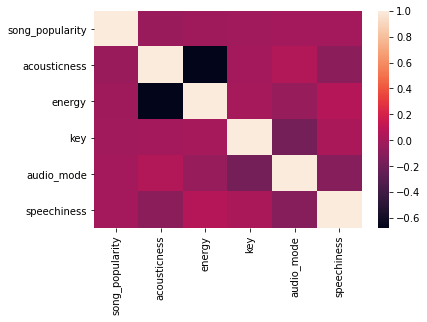

In [30]:
hcorrCols = ['energy', 'loudness', 'danceability', 'audio_valence']
removeCols = [ 'loudness', 'danceability', 'audio_valence', 'liveness', 'tempo', 'instrumentalness', 'time_signature', 'song_duration_ms']
_finalcols = []
for c in _cols:
    if c not in removeCols:
        _finalcols.append(c)
        
sns.heatmap(__sdata[_finalcols].corr())
_finalcols

In [38]:
km = KMeans(6)
km.fit(__sdata)
cluster = km.predict(__sdata)
data = {'name' : _sdata['song_name'], 'popularity': _sdata['song_popularity'], 'cluster': cluster}

df = pd.DataFrame(data)

df[df.cluster == 0]

,name,popularity,cluster
2,Seven Nation Army,76,0
3,By The Way,74,0
7,Are You Gonna Be My Girl,76,0
8,Mr. Brightside,80,0
10,The Middle,78,0
...,...,...,...
18729,Left Alone,47,0
18765,Dirty Old Town,68,0
18777,Why Woman,63,0
18798,Real Peach,28,0
